In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

# Para graficar el árbol de decisión
from sklearn.tree import export_graphviz
import graphviz
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('winequality-red.csv')  # importamos ela archivo

In [3]:
#es importante que los datos se encuentren limpios
data = data.dropna()

In [4]:
# Mostrar información general del dataset
print("Información del Dataset:")
print(data.info())

Información del Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [5]:
# Ver las primeras filas
print("\nPrimeras filas del Dataset:")
print(data.head())


Primeras filas del Dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8   

In [6]:
print("\ntipos de datos:")
data.dtypes


tipos de datos:


fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [7]:
print("\nDescripción estadística:")
data.describe()


Descripción estadística:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


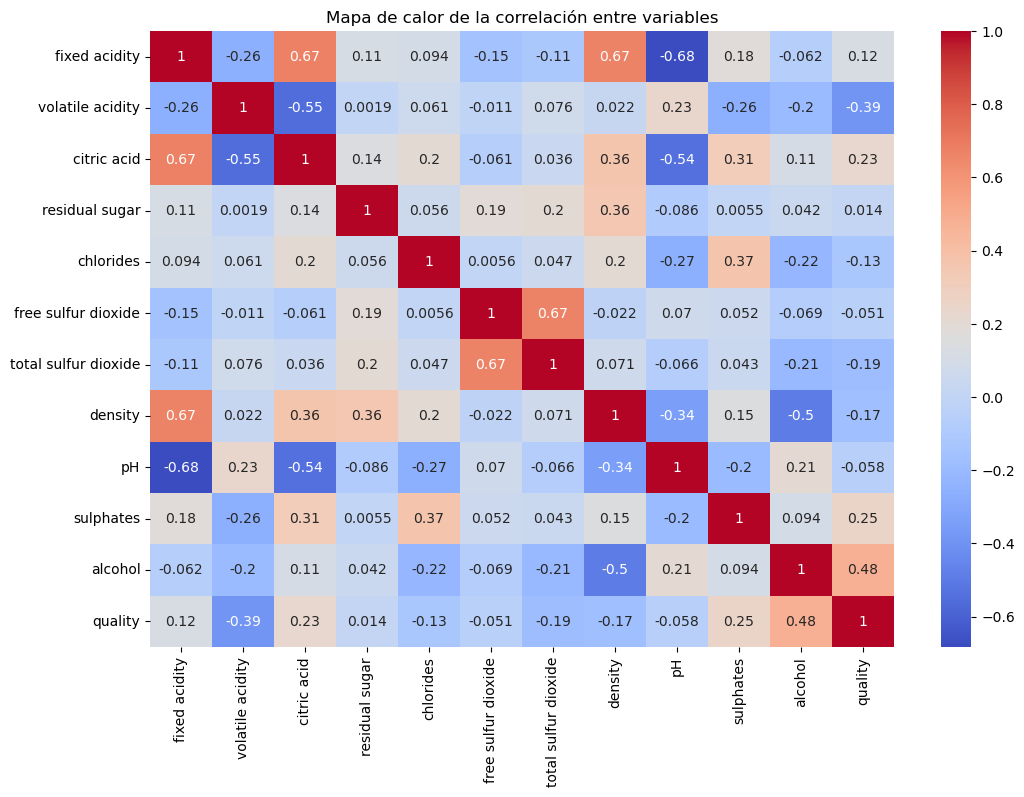

In [9]:
# Correlación entre variables
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Mapa de calor de la correlación entre variables")
plt.show()

In [10]:
# Verificar valores faltantes
print("\nValores nulos en el dataset:")
print(data.isnull().sum())
# Escalado de datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop('quality', axis=1))
scaled_data = pd.DataFrame(scaled_data, columns=data.columns[:-1])


Valores nulos en el dataset:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [11]:
# Utilizar SelectKBest para elegir las mejores características para el modelo
X = scaled_data  # Características (todas menos 'quality')
y = data['quality']  # Variable objetivo
selector = SelectKBest(score_func=f_classif, k=8)  # Selección de las 8 mejores características
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print(f"Características seleccionadas: {selected_features}")

Características seleccionadas: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides',
       'total sulfur dioxide', 'density', 'sulphates', 'alcohol'],
      dtype='object')


In [12]:
# División de los datos en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)


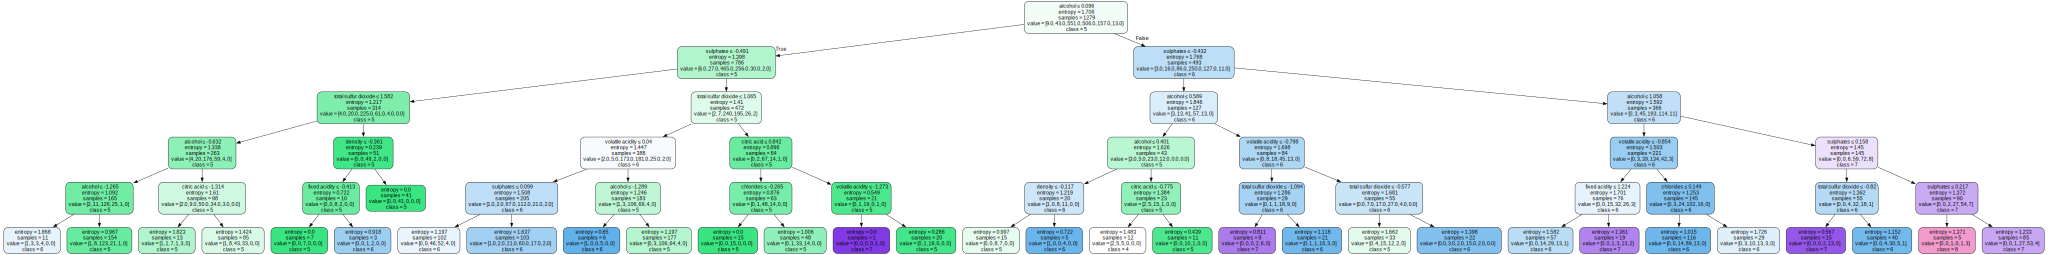

In [13]:
# Configuramos hiperparámetros como profundidad máxima y criterio de división
model = DecisionTreeClassifier(max_depth=5, criterion='entropy', random_state=42)
model.fit(X_train, y_train)

# Visualización del árbol de decisión entrenado
from graphviz import Source
# Exportar el árbol de decisión a un archivo .dot
export_graphviz(model, out_file="tree.dot", 
                feature_names=selected_features,  # Nombres de las características seleccionadas
                class_names=[str(cls) for cls in sorted(y.unique())],  # Etiquetas de clase
                filled=True, rounded=True, 
                special_characters=True)

# Leer y renderizar el archivo .dot
with open("tree.dot") as f:
    dot_graph = f.read()
    
# Visualizar el árbol de decisión en el notebook
graph = Source(dot_graph)
graph.render("tree", format="png", cleanup=False)  # Opcional: guarda en PNG y no elimina archivos
graph

Reporte de Clasificación:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.64      0.73      0.68       130
           6       0.55      0.57      0.56       132
           7       0.45      0.33      0.38        42
           8       0.00      0.00      0.00         5

    accuracy                           0.57       320
   macro avg       0.27      0.27      0.27       320
weighted avg       0.55      0.57      0.56       320



C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


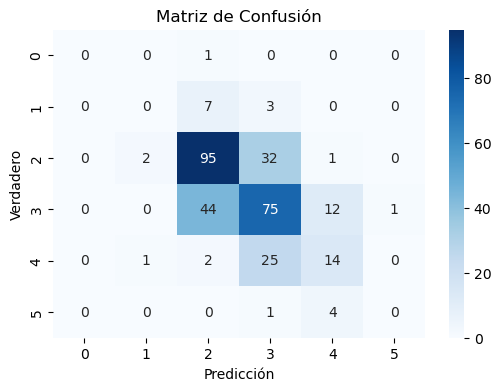

In [14]:
# Predicciones en el conjunto de test
y_pred = model.predict(X_test)
# Métricas de evaluación
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicción")
plt.ylabel("Verdadero")
plt.title("Matriz de Confusión")
plt.show()

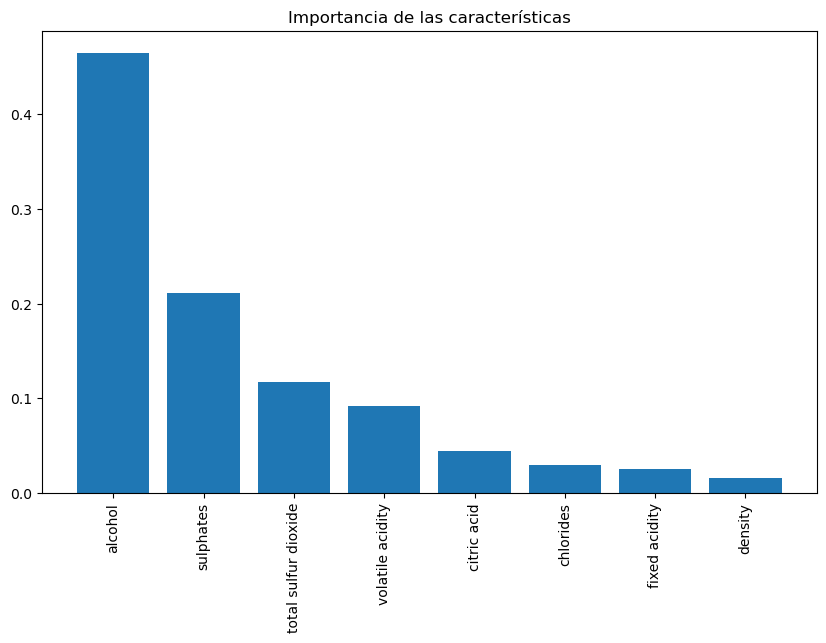

In [15]:
# Importancia de características
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Importancia de las características")
plt.bar(range(X_new.shape[1]), importances[indices], align="center")
plt.xticks(range(X_new.shape[1]), selected_features[indices], rotation=90)
plt.show()

In [16]:
# Mostrar los resultados finales del modelo y análisis
print("Análisis de Resultados:")
print("Este modelo de árbol de decisión muestra las características que más influyen en la calidad del vino.")
print("Las métricas de evaluación sugieren que el modelo tiene una precisión moderada en la predicción de la calidad del vino.")

Análisis de Resultados:
Este modelo de árbol de decisión muestra las características que más influyen en la calidad del vino.
Las métricas de evaluación sugieren que el modelo tiene una precisión moderada en la predicción de la calidad del vino.
